In [6]:
import tensorflow as tf
w1 = tf.random.normal([4,3])
w2 = tf.random.normal([4,2])
loss_reg = tf.reduce_sum(tf.math.abs(w1)) + tf.reduce_sum(tf.math.abs(w2))
print(w1)
print(w2)
print(loss_reg)

tf.Tensor(
[[-1.4577034   0.0866904  -1.8632027 ]
 [-0.14102101 -1.6191782  -1.0514189 ]
 [-1.6845542  -0.07506507 -2.0420094 ]
 [-2.0004418   2.2996054  -0.40466398]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[ 0.7023419   0.27511302]
 [ 0.2765238   0.98329395]
 [ 0.59940374  0.83733517]
 [ 0.4451627  -1.3279591 ]], shape=(4, 2), dtype=float32)
tf.Tensor(20.172688, shape=(), dtype=float32)


In [7]:
w1 = tf.random.normal([4,3])
w2 = tf.random.normal([4,2])
loss_reg = tf.reduce_sum(tf.square(w1)) + tf.reduce_sum(tf.square(w2))
print(w1)
print(w2)
print(loss_reg)

tf.Tensor(
[[ 0.28140497  0.39330506 -2.5244906 ]
 [-0.24841525  1.0828516  -1.2292317 ]
 [-1.6388924  -0.2966573   0.5808401 ]
 [ 0.00306546  0.6412053   0.7534265 ]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[-2.3305376   0.04221688]
 [-0.32354116 -1.2677515 ]
 [ 1.5070761   0.60645044]
 [-0.07171921 -2.3088028 ]], shape=(4, 2), dtype=float32)
tf.Tensor(28.56221, shape=(), dtype=float32)


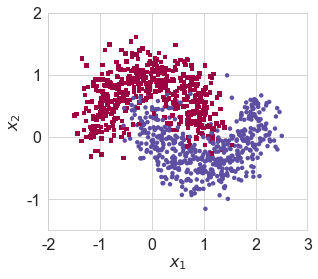

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

N_SAMPLES = 1000
TEST_SIZE = None
X,y = make_moons(n_samples=N_SAMPLES, noise=0.25, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = 42)

def mscatter(x, y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax = plt.gca()
    sc = ax.scatter(x, y, **kw)
    if (m is not None) and (len(m) == len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

def make_plot(X, y, plot_name, file_name, XX=None, YY=None, preds=None, dark=False):
    # 绘制数据集的分布， X 为 2D 坐标， y 为数据点的标签
    if dark:
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    axes = plt.gca()
    axes.set_xlim([-2, 3])
    axes.set_ylim([-1.5, 2])
    axes.set(xlabel="$x_1$", ylabel="$x_2$")
    plt.title(plot_name, fontsize=20, fontproperties='SimHei')
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if XX is not None and YY is not None and preds is not None:
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha=0.08, cmap=plt.cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    # 绘制散点图，根据标签区分颜色m=markers
    markers = ['o' if i == 1 else 's' for i in y.ravel()]
    mscatter(X[:, 0], X[:, 1], c=y.ravel(), s=20, cmap=plt.cm.Spectral, edgecolors='none', m=markers, ax=axes)
    # 保存矢量图
    plt.savefig(file_name)
    plt.show()
    plt.close()

make_plot(X, y, None, "data.svg")

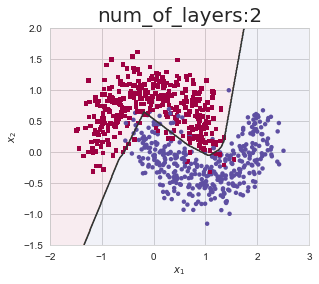

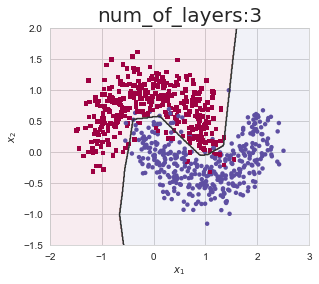

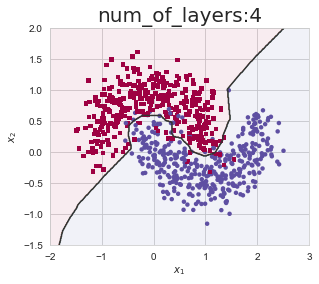

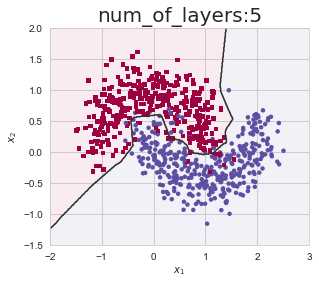

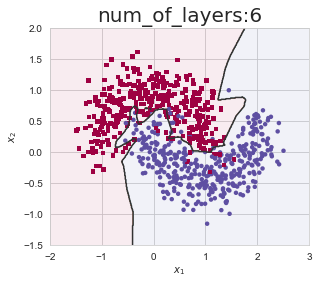

In [23]:
import numpy as np
from tensorflow.keras import layers, Sequential, regularizers
from mpl_toolkits.mplot3d import Axes3D

N_EPOCHS = 500

def network_layers_influence(X_train, y_train):
    # 构建 5 种不同层数的网络
    for n in range(5):
        # 创建容器
        model = Sequential()
        # 创建第一层
        model.add(layers.Dense(8, input_dim=2, activation='relu'))
        # 添加 n 层，共 n+2 层
        for _ in range(n):
            model.add(layers.Dense(32, activation='relu'))
        # 创建最末层
        model.add(layers.Dense(1, activation='sigmoid'))
        # 模型装配与训练
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)
        # 绘制不同层数的网络决策边界曲线
        # 可视化的 x 坐标范围为[-2, 3]
        xx = np.arange(-2, 3, 0.01)
        # 可视化的 y 坐标范围为[-1.5, 2]
        yy = np.arange(-1.5, 2, 0.01)
        # 生成 x-y 平面采样网格点，方便可视化
        XX, YY = np.meshgrid(xx, yy)
        preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
        title = "num_of_layers:{0}".format(2 + n)
        file = "capacity_of_net_%i.png" % (2 + n)
        make_plot(X_train, y_train, title, file, XX, YY, preds)

network_layers_influence(X_train, y_train)

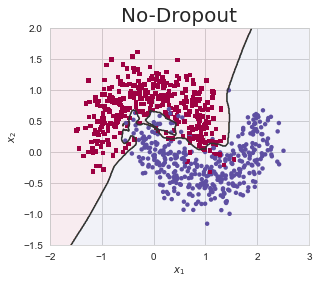

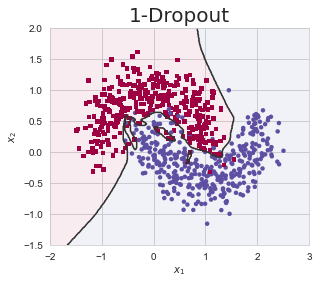

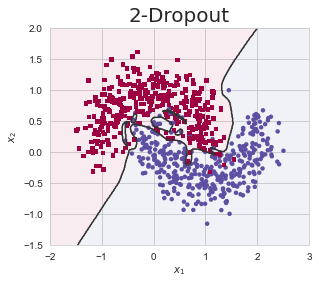

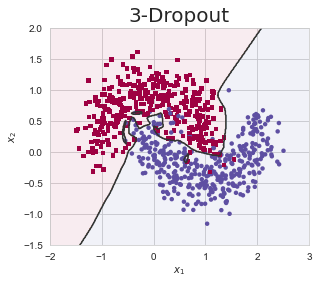

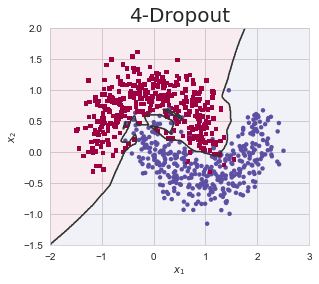

In [19]:
def dropout_influence(X_train, y_train):
    # 构建 5 种不同数量 Dropout 层的网络
    for n in range(5):
        # 创建容器
        model = Sequential()
        # 创建第一层
        model.add(layers.Dense(8, input_dim=2, activation='relu'))
        counter = 0
        # 网络层数固定为 5
        for _ in range(5):
            model.add(layers.Dense(64, activation='relu'))
        # 添加 n 个 Dropout 层
        if counter < n:
            counter += 1
            model.add(layers.Dropout(rate=0.5))

        # 输出层
        model.add(layers.Dense(1, activation='sigmoid'))
        # 模型装配
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # 训练
        model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)
        # 绘制不同 Dropout 层数的决策边界曲线
        # 可视化的 x 坐标范围为[-2, 3]
        xx = np.arange(-2, 3, 0.01)
        # 可视化的 y 坐标范围为[-1.5, 2]
        yy = np.arange(-1.5, 2, 0.01)
        # 生成 x-y 平面采样网格点，方便可视化
        XX, YY = np.meshgrid(xx, yy)
        preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
        title = "No-Dropout" if n == 0 else "{0}-Dropout".format(n)
        file = "Dropout_%i.png" % n
        make_plot(X_train, y_train, title, file, XX, YY, preds)

dropout_influence(X_train, y_train)

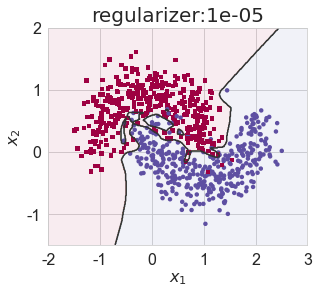

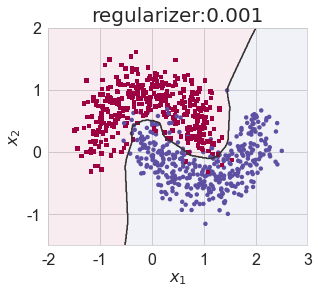

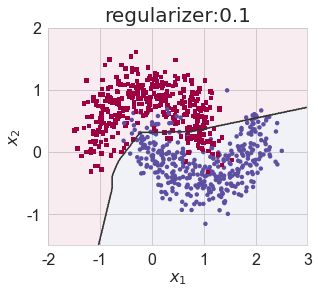

<ipython-input-26-577d1b64434f>:47: UserWarning: No contour levels were found within the data range.
  plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)


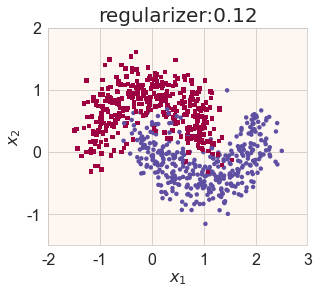

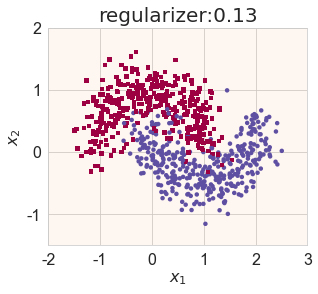

In [36]:
def build_model_with_regularization(_lambda):
    # 创建带正则化项的神经网络
    model = Sequential()
    model.add(layers.Dense(8, input_dim=2, activation='relu'))  # 不带正则化项
    # 2-4层均是带 L2 正则化项
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(_lambda)))
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(_lambda)))
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(_lambda)))
    # 输出层
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 模型装配
    return model

def plot_weights_matrix(model, layer_index, plot_name, file_name):
    # 绘制权值范围函数
    # 提取指定层的权值矩阵
    weights = model.layers[layer_index].get_weights()[0]
    shape = weights.shape
    # 生成和权值矩阵等大小的网格坐标
    X = np.array(range(shape[1]))
    Y = np.array(range(shape[0]))
    X, Y = np.meshgrid(X, Y)
    # 绘制3D图
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    plt.title(plot_name, fontsize=20)
    # 绘制权值矩阵范围
    ax.plot_surface(X, Y, weights, cmap=plt.get_cmap('rainbow'), linewidth=0)
    # 设置坐标轴名
    ax.set_xlabel('x', fontsize=16, rotation=0)
    ax.set_ylabel('y', fontsize=16, rotation=0)
    ax.set_zlabel('weight', fontsize=16, rotation=90)
#     保存矩阵范围图
    plt.savefig(file_name + ".svg")
    plt.close(fig)


def regularizers_influence(X_train, y_train):
    for _lambda in [1e-5, 1e-3, 1e-1, 0.12, 0.13]:  # 设置不同的正则化系数
        # 创建带正则化项的模型
        model = build_model_with_regularization(_lambda)
        # 模型训练
        model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)
        # 绘制权值范围
        layer_index = 2
        plot_title = "regularizer:{}".format(_lambda)
        file_name = "regularizer_" + str(_lambda)
        # 绘制网络权值范围图
        plot_weights_matrix(model, layer_index, plot_title, file_name)
        # 绘制不同正则化系数的决策边界线
        # 可视化的 x 坐标范围为[-2, 3]
        xx = np.arange(-2, 3, 0.01)
        # 可视化的 y 坐标范围为[-1.5, 2]
        yy = np.arange(-1.5, 2, 0.01)
        # 生成 x-y 平面采样网格点，方便可视化
        XX, YY = np.meshgrid(xx, yy)
        preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
        title = "regularizer:{}".format(_lambda)
        file = "regularizer_%g.svg" % _lambda
        make_plot(X_train, y_train, title, file, XX, YY, preds)

regularizers_influence(X_train, y_train)